# Statistics of KuaiRec

We provide some basic statistics of the KuaiRec dataset. The description of this dataset can be referred to https://chongminggao.github.io/KuaiRec/

## Load data

In [1]:
# If you are running locally, make sure you are in the directory of KuaiRec.
rootpath="./"

If you are using Google Colab, make sure you have added shortcut of this [shared link](https://drive.google.com/drive/folders/1bAm07YnKRKB6SVHB8Mqz6v6W8ppLaJwB) to your own Google Drive. Then, you should load it from your space by indicating the correct path as follows.

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# rootpath="./drive/MyDrive/Datasets/KuaiRec/" # Make sure this path corresponds to KuaiRec in your Drive.

In [2]:
import pandas as pd

print("Loading big matrix...")
big_matrix = pd.read_csv(rootpath + "data/big_matrix.csv")
print("Loading small matrix...")
small_matrix = pd.read_csv(rootpath + "data/small_matrix.csv")
print("Loading matrix_2month...")
matrix_2month = pd.read_csv(rootpath + "matrix_2month.csv")


print("Loading social network...")
social_network = pd.read_csv(rootpath + "data/social_network.csv")
social_network["friend_list"] = social_network["friend_list"].map(eval)

print("Loading item features...")
item_categories = pd.read_csv(rootpath + "data/item_categories.csv")
item_categories["feat"] = item_categories["feat"].map(eval)

print("Loading user features...")
user_features = pd.read_csv("data/user_features.csv")

print("Loading items' daily features...")
item_daily_features = pd.read_csv("data/item_daily_features.csv")

print("All data loaded.")

Loading big matrix...
Loading small matrix...
Loading matrix_2month...
Loading social network...
Loading item features...
Loading user features...
Loading items' daily features...
All data loaded.


## Statistics 

In [4]:
big_matrix

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000
...,...,...,...,...,...,...,...,...
12530801,7175,1281,34618,140017,2020-09-05 15:07:10.576,20200905,1.599290e+09,0.247241
12530802,7175,3407,12619,21888,2020-09-05 15:08:45.228,20200905,1.599290e+09,0.576526
12530803,7175,10360,2407,7067,2020-09-05 19:10:29.041,20200905,1.599304e+09,0.340597
12530804,7175,10360,6455,7067,2020-09-05 19:10:36.995,20200905,1.599304e+09,0.913400


In [ ]:
def get_ratio_label(x):
    if x['watch_ratio'] >1:
        return 1
    if x['watch_ratio'] <=1:
        return 0

big_matrix.loc[:,'ratio_label'] = big_matrix.apply(get_ratio_label,axis = 1)

In [3]:
small_matrix

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364
...,...,...,...,...,...,...,...,...
4676565,7162,2267,11908,5467,NaN,NaN,NaN,2.178160
4676566,7162,2065,11919,6067,NaN,NaN,NaN,1.964562
4676567,7162,1296,16690,19870,NaN,NaN,NaN,0.839960
4676568,7162,4822,11862,24400,NaN,NaN,NaN,0.486148


In [4]:
small_matrix['date'].value_counts()#.unique()

20200730.0    128084
20200731.0    126673
20200729.0    120676
20200806.0    118003
20200805.0    115568
               ...  
20200901.0     20246
20200902.0     14746
20200903.0     10247
20200904.0      5062
20200905.0      2931
Name: date, Length: 63, dtype: int64

## 非空small matrix的统计

#### 可跳过，不运行

In [4]:
matrix_2month = small_matrix[small_matrix['date'].notnull()].copy()#取出time非空的数据,可不运行
matrix_2month

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364
...,...,...,...,...,...,...,...,...
4676370,7162,9177,5315,37205,2020-09-01 20:06:35.984,20200901.0,1.598962e+09,0.142857
4676371,7162,4987,10085,8167,2020-09-02 14:44:51.342,20200902.0,1.599029e+09,1.234848
4676372,7162,7988,50523,49319,2020-09-03 08:45:01.474,20200903.0,1.599094e+09,1.024412
4676373,7162,6533,2190,8000,2020-09-04 22:56:32.021,20200904.0,1.599231e+09,0.273750


In [8]:
def get_ratio_label(x):#筛选，时间较长，可不运行
    if x['watch_ratio'] >= 2:
        return 1
    if x['watch_ratio'] < 2:
        return 0

matrix_2month.loc[:,'ratio_label'] = matrix_2month.apply(get_ratio_label,axis = 1)

In [10]:
matrix_2month.to_csv('matrix_2month.csv')#保存结果，可不运行

#### 查看matrix_2month基本信息

In [3]:
matrix_2month

,Unnamed: 0,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio,ratio_label
0,0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103,0
1,1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377,0
2,2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311,1
3,3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388,0
4,4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364,0
...,...,...,...,...,...,...,...,...,...,...
4494573,4676370,7162,9177,5315,37205,2020-09-01 20:06:35.984,20200901.0,1.598962e+09,0.142857,0
4494574,4676371,7162,4987,10085,8167,2020-09-02 14:44:51.342,20200902.0,1.599029e+09,1.234848,0
4494575,4676372,7162,7988,50523,49319,2020-09-03 08:45:01.474,20200903.0,1.599094e+09,1.024412,0
4494576,4676373,7162,6533,2190,8000,2020-09-04 22:56:32.021,20200904.0,1.599231e+09,0.273750,0


In [10]:
matrix_2month[matrix_2month['time'].str.startswith("2020-08-21")]#查看某个日期对应的数据

,Unnamed: 0,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio,ratio_label
2889,2889,14,3105,29790,10264,2020-08-21 00:17:43.313,20200821.0,1.597940e+09,2.902377,1
2890,2890,14,4732,38016,16834,2020-08-21 00:35:49.403,20200821.0,1.597941e+09,2.258287,1
2891,2891,14,1399,57211,10667,2020-08-21 00:47:44.929,20200821.0,1.597942e+09,5.363364,1
2892,2892,14,1395,4108,9021,2020-08-21 06:52:30.562,20200821.0,1.597964e+09,0.455382,0
2893,2893,14,4719,4466,13419,2020-08-21 06:53:29.864,20200821.0,1.597964e+09,0.332812,0
...,...,...,...,...,...,...,...,...,...,...
4494336,4676133,7162,1227,2133,14171,2020-08-21 11:31:09.355,20200821.0,1.597981e+09,0.150519,0
4494337,4676134,7162,7745,11844,8188,2020-08-21 11:55:51.59,20200821.0,1.597982e+09,1.446507,0
4494338,4676135,7162,4270,11893,8300,2020-08-21 12:03:43.696,20200821.0,1.597983e+09,1.432892,0
4494339,4676136,7162,3104,5401,9621,2020-08-21 12:13:46.096,20200821.0,1.597983e+09,0.561376,0


In [8]:
data = matrix_2month.groupby('date')['ratio_label'].sum()#总体，按照每日统计
data

date
20200705.0    1878
20200706.0    2324
20200707.0    3013
20200708.0    3380
20200709.0    3636
              ... 
20200901.0    1519
20200902.0     725
20200903.0     432
20200904.0     225
20200905.0      84
Name: ratio_label, Length: 63, dtype: int64

#### 两种统计分开展示，可单独运行

In [4]:
stat1 = matrix_2month[matrix_2month['time'] <= '2020-08-22'].copy()#按每周统计，展示效果
stat1["week"] = pd.to_datetime(stat1["time"]).map(lambda x: x.week)
stat1

,Unnamed: 0,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio,ratio_label,week
0,0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103,0,27
1,1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377,0,27
2,2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311,1,27
3,3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388,0,27
4,4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364,0,27
...,...,...,...,...,...,...,...,...,...,...,...
4494336,4676133,7162,1227,2133,14171,2020-08-21 11:31:09.355,20200821.0,1.597981e+09,0.150519,0,34
4494337,4676134,7162,7745,11844,8188,2020-08-21 11:55:51.59,20200821.0,1.597982e+09,1.446507,0,34
4494338,4676135,7162,4270,11893,8300,2020-08-21 12:03:43.696,20200821.0,1.597983e+09,1.432892,0,34
4494339,4676136,7162,3104,5401,9621,2020-08-21 12:13:46.096,20200821.0,1.597983e+09,0.561376,0,34


In [11]:
stat2 = matrix_2month[matrix_2month['time'] > '2020-08-22'].copy()#后15天按每天统计
stat2["day"] = stat2['time'].str.replace("-", "").str.slice(0, 8)
stat2

,Unnamed: 0,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio,ratio_label,day
2900,2900,14,7754,8725,10321,2020-08-22 12:27:12.815,20200822.0,1.598070e+09,0.845364,0,20200822
2901,2901,14,6300,8426,7667,2020-08-22 12:28:20.803,20200822.0,1.598071e+09,1.098996,0,20200822
2902,2902,14,4715,74938,5667,2020-08-22 12:31:37.694,20200822.0,1.598071e+09,13.223575,1,20200822
2903,2903,14,10409,4442,6873,2020-08-22 12:32:49.666,20200822.0,1.598071e+09,0.646297,0,20200822
2904,2904,14,1381,4413,11796,2020-08-22 12:36:37.439,20200822.0,1.598071e+09,0.374110,0,20200822
...,...,...,...,...,...,...,...,...,...,...,...
4494573,4676370,7162,9177,5315,37205,2020-09-01 20:06:35.984,20200901.0,1.598962e+09,0.142857,0,20200901
4494574,4676371,7162,4987,10085,8167,2020-09-02 14:44:51.342,20200902.0,1.599029e+09,1.234848,0,20200902
4494575,4676372,7162,7988,50523,49319,2020-09-03 08:45:01.474,20200903.0,1.599094e+09,1.024412,0,20200903
4494576,4676373,7162,6533,2190,8000,2020-09-04 22:56:32.021,20200904.0,1.599231e+09,0.273750,0,20200904


#### 处理和统计

In [53]:
stat1 = matrix_2month[matrix_2month['time'] <= '2020-08-22'].copy()#前两个月（不包括最后的15天）按每周统计
stat1["week"] = pd.to_datetime(stat1["time"]).map(lambda x: x.week-26)
#stat1["month"] = stat1['time'].str.replace("-", "").str.slice(0, 6) #也可改成按月统计
stat1.set_index(stat1["week"],inplace=True)
stat2 = matrix_2month[matrix_2month['time'] > '2020-08-22'].copy()#后15天按每天统计
stat2["day"] = stat2['time'].str.replace("-", "").str.slice(0, 8)
stat2.set_index(stat2["day"],inplace=True)

In [54]:
stat2['day'].unique()

array(['20200822', '20200823', '20200824', '20200825', '20200826',
       '20200827', '20200828', '20200829', '20200830', '20200831',
       '20200901', '20200902', '20200903', '20200904', '20200905'],
      dtype=object)

In [55]:
s1 = stat1.groupby(stat1['week'])["ratio_label"].sum()#分组汇聚点赞数
s2 = stat2.groupby(stat2['day'])["ratio_label"].sum()
stat_likes = pd.concat([s1,s2])#拼接两表
s2 

day
20200822    2745
20200823    2816
20200824    2269
20200825    2155
20200826    1649
20200827    1879
20200828    1793
20200829    1797
20200830    1727
20200831    1316
20200901    1521
20200902     724
20200903     431
20200904     225
20200905      84
Name: ratio_label, dtype: int64

In [56]:
s1_all = stat1['week'].value_counts()
s1_all = s1_all.sort_index()
s1_all

1     28338
2    431692
3    612595
4    605467
5    772848
6    776223
7    525063
8    321535
Name: week, dtype: int64

In [57]:
s2_all = stat2['day'].value_counts()
s2_all = s2_all.sort_index()
s2_all

20200822    49556
20200823    48203
20200824    46010
20200825    33873
20200826    33280
20200827    37171
20200828    30223
20200829    35309
20200830    28913
20200831    25049
20200901    20259
20200902    14739
20200903    10241
20200904     5061
20200905     2930
Name: day, dtype: int64

In [58]:
s1 = (s1/s1_all).copy()
s1_zero = (s1_all - s1).copy()

In [59]:
s2 = (s2/s2_all).copy()
s2_zero = (s2_all - s2).copy()

In [60]:
s_ratio = pd.concat([s1,s2])
stat_zero = pd.concat([s1_zero,s2_zero])

##### 点赞数统计

<AxesSubplot:>

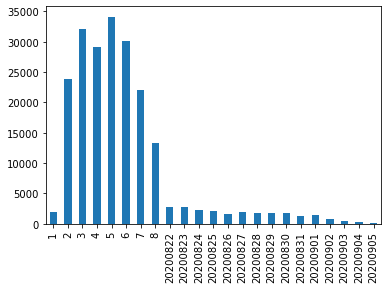

In [47]:
import matplotlib.pyplot as plt
stat.plot(kind='bar')

##### 非点赞数统计

<AxesSubplot:>

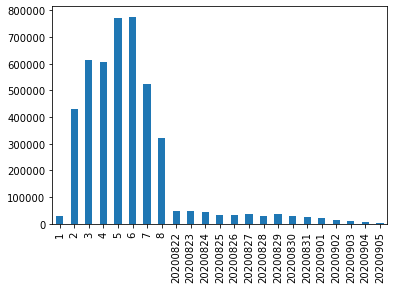

In [61]:
stat_zero.plot(kind='bar')

##### 比率统计

<AxesSubplot:>

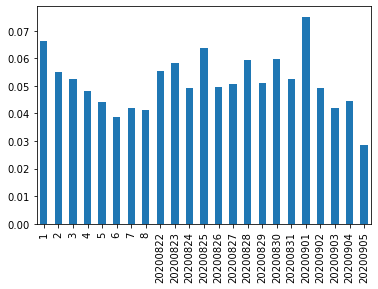

In [62]:
s_ratio.plot(kind='bar')

In [25]:
matrix_15day = small_matrix[small_matrix['date'].isnull()].copy()
matrix_15day

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
3234,14,6177,4407,7013,NaN,NaN,NaN,0.628404
3235,14,5639,8453,57880,NaN,NaN,NaN,0.146044
3236,14,1268,4478,9534,NaN,NaN,NaN,0.469687
3237,14,7126,11563,57669,NaN,NaN,NaN,0.200506
3238,14,10394,11436,23584,NaN,NaN,NaN,0.484905
...,...,...,...,...,...,...,...,...
4676565,7162,2267,11908,5467,NaN,NaN,NaN,2.178160
4676566,7162,2065,11919,6067,NaN,NaN,NaN,1.964562
4676567,7162,1296,16690,19870,NaN,NaN,NaN,0.839960
4676568,7162,4822,11862,24400,NaN,NaN,NaN,0.486148


In [ ]:
def get_ratio_label(x):
    if x['watch_ratio'] >1:
        return 1
    if x['watch_ratio'] <=1:
        return 0

matrix_15day.loc[:,'ratio_label'] = matrix_15day.apply(get_ratio_label,axis = 1)

In [23]:
matrix_15day['ratio_label'].value_counts()

0    138814
1     43178
Name: ratio_label, dtype: int64